In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding =('ISO-8859-1'),low_memory =False)

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4423,ham,Update your face book status frequently :),NaN,NaN,NaN
4101,ham,Ok then i will come to ur home after half an hour,NaN,NaN,NaN
334,spam,Valentines Day Special! Win over å£1000 in our...,NaN,NaN,NaN
3764,spam,Someone U know has asked our dating service 2 ...,NaN,NaN,NaN
4164,spam,"Dear Voucher Holder, To claim this weeks offer...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1.Data Cleaning
# 2.EDA
# 3.Text-preprossing
# 4.Model Building
# 5.Evaluation
# 6.Improvements
# 7.Website making
# 8. Deploying

## 1.Data Cleaning

In [6]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
1193,spam,Sex up ur mobile with a FREE sexy pic of Jorda...
216,ham,Tired. I haven't slept well the past few nights.
449,ham,10 min later k...
1850,ham,Then cant get da laptop? My matric card wif Ì_...
296,ham,Unless it's a situation where YOU GO GURL woul...


In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
3127,ham,would u fuckin believe it they didnt know i ha...
683,spam,Hi I'm sue. I am 20 years old and work as a la...
3533,ham,Good evening! How are you?
2536,ham,You do what all you like
536,ham,"Probably gonna be here for a while, see you la..."


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [17]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(5169, 2)

## 2. EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [22]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x2957698dd30>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

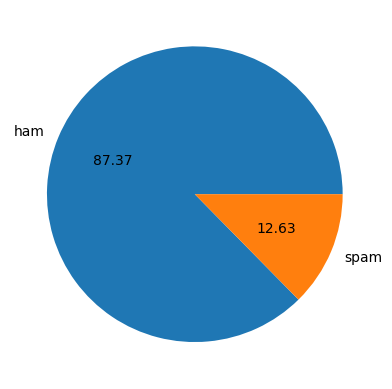

In [23]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")

In [24]:
# Data is imbalanced

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anmol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
#number of characters
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [28]:
df['num_characters'] = df['text'].apply(len)

In [29]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
# num of words
from nltk.tokenize import word_tokenize

In [31]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [32]:
df.head()

,target,text,num_characters,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [33]:
import re

In [34]:
df['num_sentences'] = df['text'].apply(lambda x: len(re.split(r'[.!?]+', x)) - 1)

In [35]:
df.head()

,target,text,num_characters,word_count,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [36]:
df[['num_characters','word_count','num_sentences']].describe()

,num_characters,word_count,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.846779
std,58.236293,11.068488,1.745441
min,2.000000,1.000000,0.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,39.000000


In [37]:
# ham
df[df['target'] == 0][['num_characters','word_count','num_sentences']].describe()

,num_characters,word_count,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.692648
std,56.358207,11.116240,1.681598
min,2.000000,1.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,39.000000


In [38]:
#spam
df[df['target'] == 1][['num_characters','word_count','num_sentences']].describe()

,num_characters,word_count,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.912711
std,30.137753,5.967672,1.806610
min,13.000000,2.000000,0.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [39]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

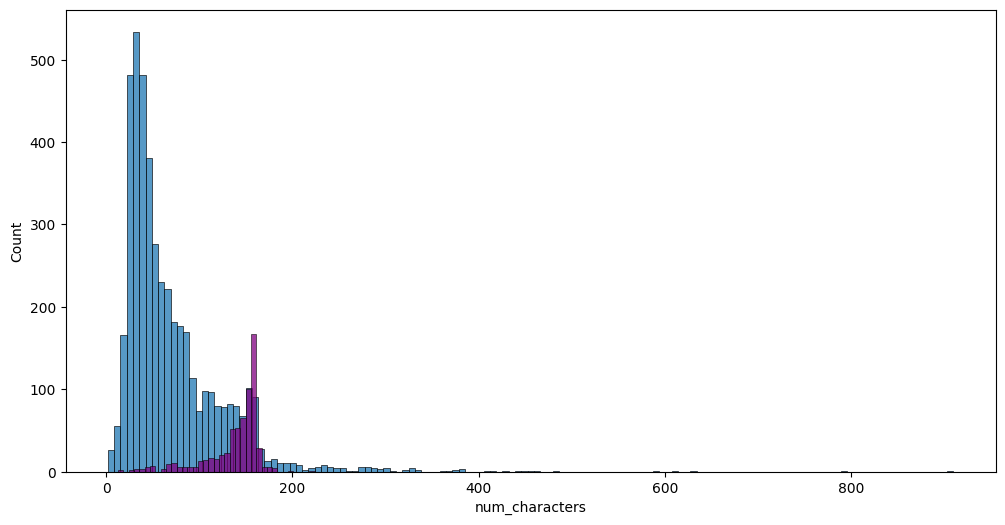

In [40]:
#plot histogram for better idea 
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='purple')

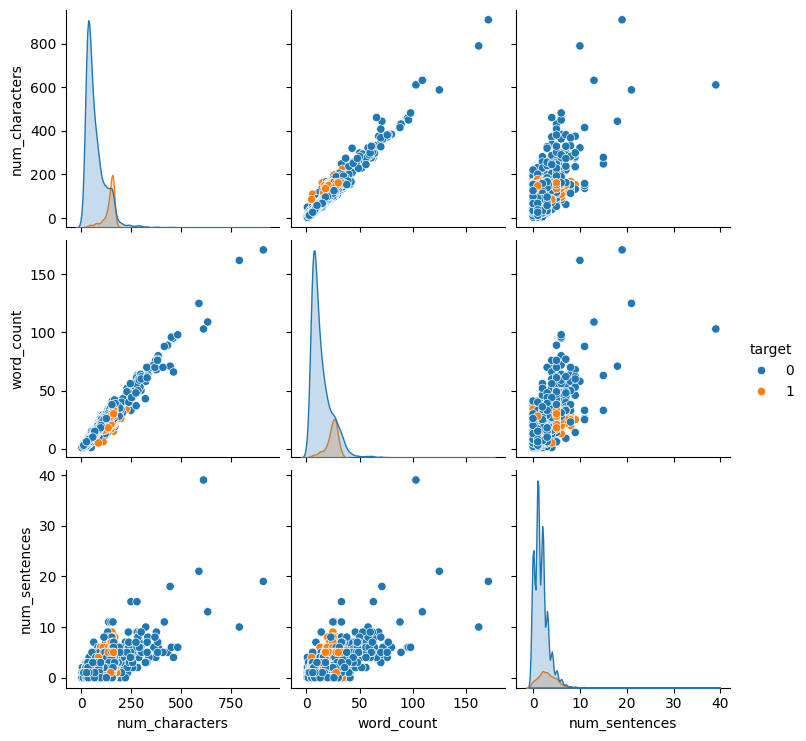

In [41]:
sns.pairplot(df,hue='target')

## 3. Data Preprocessing
-Lower case
-Tokenization
-Removing special characters
-Removing stop words and punctuation
-Stemming

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anmol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anmol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
import re
import string
from collections import Counter

# Define a list of stopwords (manual or from a lightweight source)
stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",
    "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
    'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has',
    'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or',
    'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
    'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
    'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once',
    'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
    'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
    'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now',
    'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
    "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn',
    "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan',
    "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't",
    'wouldn', "wouldn't"
])

# Basic stemming function
def simple_stem(word):
    suffixes = ["ing", "ly", "ed", "ious", "ies", "ive", "es", "s", "ment"]
    for suffix in suffixes:
        if word.endswith(suffix):
            return word[: -len(suffix)]
    return word

# Transform text function without NLTK
def transform_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation using regex
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize text by splitting on whitespace
    words = text.split()

    # Remove stopwords and punctuation, then apply stemming
    processed_words = [simple_stem(word) for word in words if word not in stopwords]

    # Join words back to a single string
    return " ".join(processed_words)

# Example usage
sample_text = "I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."
transformed_text = transform_text(sample_text)
print(transformed_text)


im gonna home soon dont want talk stuff anymore tonight k  cri enough today


In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [46]:
df['transformed_text'] = [transform_text(text) for text in df['text']]

In [47]:
df.head()

,target,text,num_characters,word_count,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazy available bugi n great w...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar jok wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entry 2 wk comp win fa cup final tkt 21st...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say ear hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah dont think go usf liv around though


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [49]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

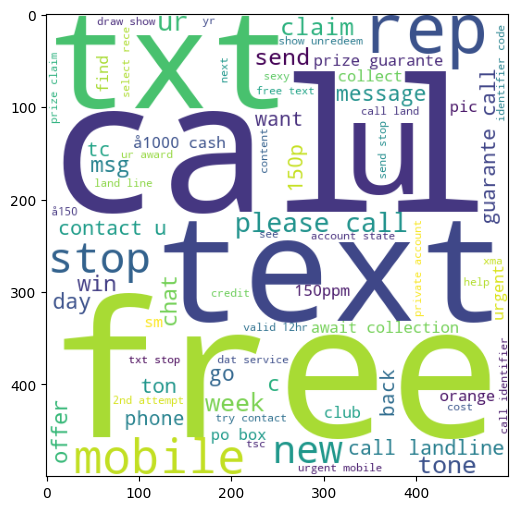

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [51]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

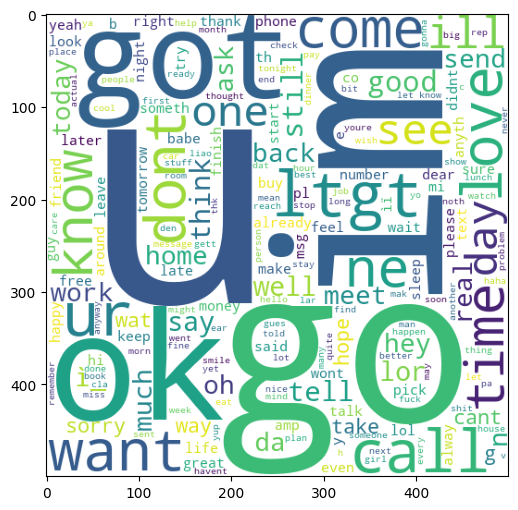

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [53]:
df.head()

,target,text,num_characters,word_count,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazy available bugi n great w...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar jok wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entry 2 wk comp win fa cup final tkt 21st...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say ear hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah dont think go usf liv around though


In [54]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

10805

In [56]:
from collections import Counter

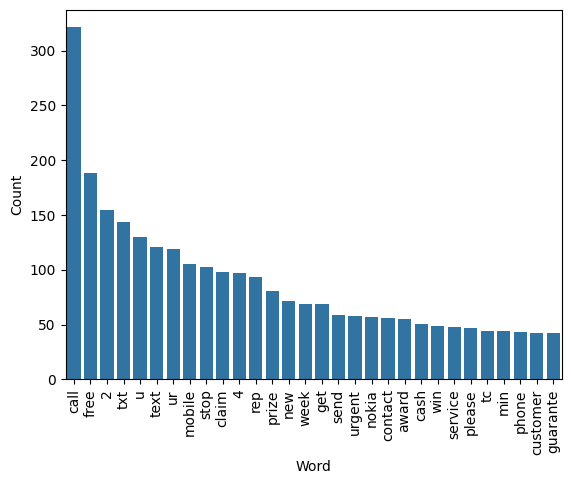

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

# Assuming df is your DataFrame and you have already created spam_corpus
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# Get the 30 most common words
word_counts = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_word_counts = pd.DataFrame(word_counts, columns=['Word', 'Count'])

# Create the barplot
sns.barplot(x='Word', y='Count', data=df_word_counts)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [58]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [59]:
len(ham_corpus)

36860

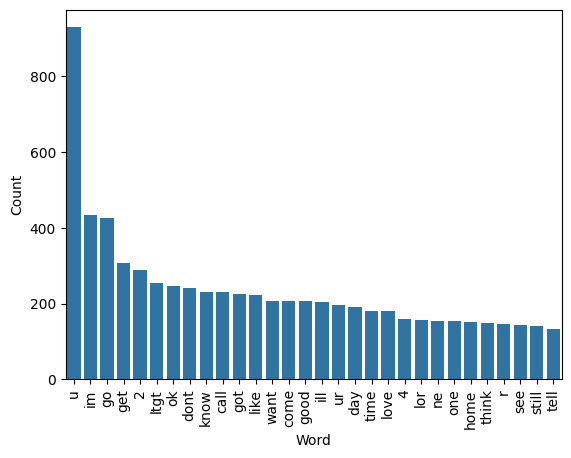

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

# Create ham_corpus for non-spam messages
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

# Get the 30 most common words
word_counts_ham = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_word_counts_ham = pd.DataFrame(word_counts_ham, columns=['Word', 'Count'])

# Create the barplot for ham messages
sns.barplot(x='Word', y='Count', data=df_word_counts_ham)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [61]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,word_count,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazy available bugi n great w...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar jok wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entry 2 wk comp win fa cup final tkt 21st...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say ear hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah dont think go usf liv around though


## 4.Model Building

In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [63]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [64]:
X.shape

(5169, 3000)

In [65]:
y = df['target'].values

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[787 109]
 [ 23 115]]
0.5133928571428571


In [71]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


In [72]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[896   0]
 [ 18 120]]
1.0


In [73]:
!pip install xgboost



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [75]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [76]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [77]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [78]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, np.float64(0.9669421487603306))

In [79]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9669421487603306
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9738878143133463
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8214285714285714
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9514563106796117
For  RF
Accuracy -  0.9709864603481625
Precision -  0.990909090909091


C:\Users\anmol\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9545454545454546
Precision -  0.8760330578512396
For  BgC
Accuracy -  0.9632495164410058
Precision -  0.9032258064516129
For  ETC
Accuracy -  0.9738878143133463
Precision -  0.9586776859504132
For  GBDT
Accuracy -  0.9448742746615088
Precision -  0.8932038834951457
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.940677966101695


In [80]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [81]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
2,NB,0.973888,1.000000
5,RF,0.970986,0.990909
0,SVC,0.975822,0.966942
8,ETC,0.973888,0.958678
4,LR,0.956480,0.951456
10,xgb,0.967118,0.940678
7,BgC,0.963250,0.903226
9,GBDT,0.944874,0.893204
6,AdaBoost,0.954545,0.876033


In [82]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [83]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,NB,Accuracy,0.973888
2,RF,Accuracy,0.970986
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.973888
5,LR,Accuracy,0.956480
6,xgb,Accuracy,0.967118
7,BgC,Accuracy,0.963250
8,GBDT,Accuracy,0.944874
9,AdaBoost,Accuracy,0.954545


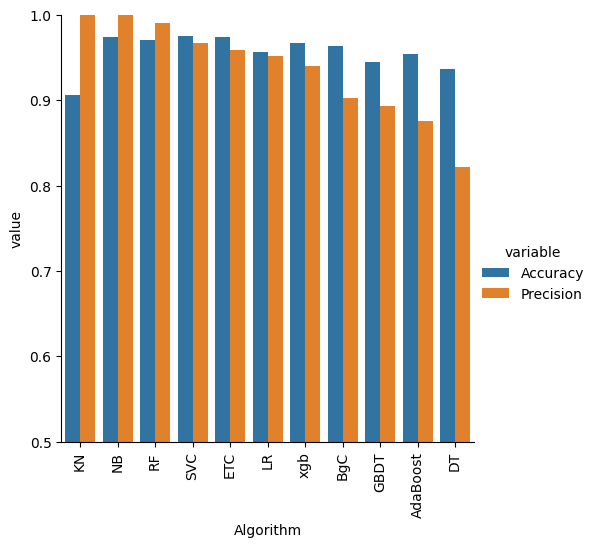

In [84]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [85]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [88]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [89]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [90]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [91]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
1,NB,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000
2,RF,0.970986,0.990909,0.970986,0.990909,0.970986,0.990909,0.970986,0.990909
3,SVC,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942
4,ETC,0.973888,0.958678,0.973888,0.958678,0.973888,0.958678,0.973888,0.958678
5,LR,0.956480,0.951456,0.956480,0.951456,0.956480,0.951456,0.956480,0.951456
6,xgb,0.967118,0.940678,0.967118,0.940678,0.967118,0.940678,0.967118,0.940678
7,BgC,0.963250,0.903226,0.963250,0.903226,0.963250,0.903226,0.963250,0.903226
8,GBDT,0.944874,0.893204,0.944874,0.893204,0.944874,0.893204,0.944874,0.893204
9,AdaBoost,0.954545,0.876033,0.954545,0.876033,0.954545,0.876033,0.954545,0.876033


In [92]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [93]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [94]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [95]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [96]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [97]:
from sklearn.ensemble import StackingClassifier

In [98]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [99]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.952755905511811


In [100]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))